### Importing Packages

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteCaloriesNarrow_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteIntensitiesWide_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteMETsNarrow_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteSleep_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteStepsNarro

### Reading in Data

In [2]:
file_path = '/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/'
df_daily = pd.read_csv(file_path + 'dailyActivity_merged.csv')
df_daily_orig = df_daily
df_daily.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


### Data Preprocessing of Daily Activity

In [3]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

##### A quick check on our data tells us that no values are null in the dataset

In [4]:
df_daily.isnull().values.any()

False

##### Converting ActivityDate to a datetime column

In [5]:
df_daily['ActivityDate'] = pd.to_datetime(df_daily['ActivityDate'])
df_daily['ActivityDate'].head()

0   2016-04-12
1   2016-04-13
2   2016-04-14
3   2016-04-15
4   2016-04-16
Name: ActivityDate, dtype: datetime64[ns]

# EDA of Daily Activity 

##### Our distributions of both Total Distance and Total Steps are Right Skewed.

##### Many days are spent walking less than one thousand steps or a mile

<AxesSubplot:xlabel='TotalSteps', ylabel='Count'>

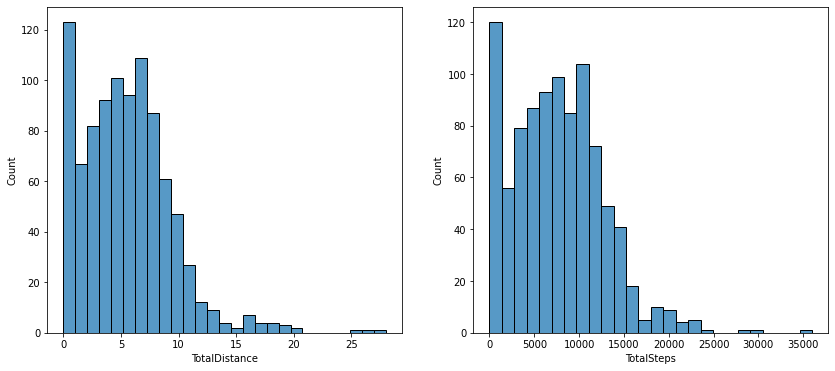

In [6]:
fig, ax = plt.subplots(1,2, figsize = (14,6))

sns.histplot(data = df_daily['TotalDistance'], ax = ax[0])

sns.histplot(data = df_daily['TotalSteps'], ax = ax[1])

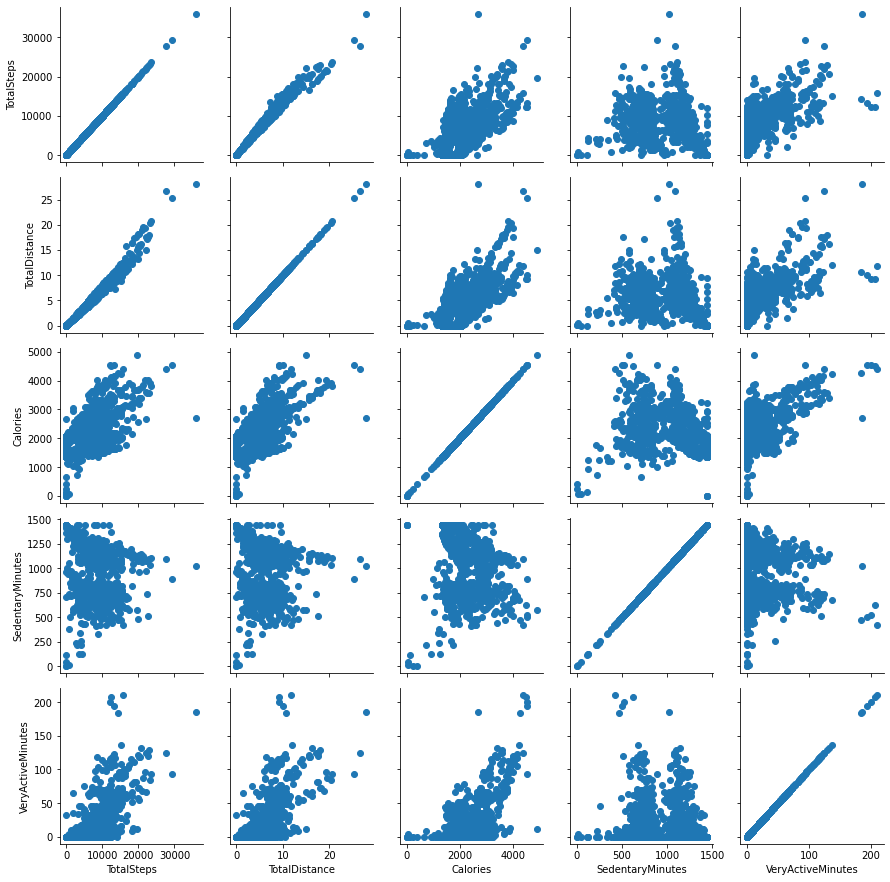

In [7]:
scatter_plots = sns.PairGrid(df_daily[['TotalSteps', 'TotalDistance', 'Calories','SedentaryMinutes','VeryActiveMinutes']])
scatter_plots.map(plt.scatter)

#### Findings from PairPlot

* Calories has a high positive correlation with Steps, Distance, and Very Active Minutes.
* Sedentary Minutes has a negative correlation with Total Steps, Very Active Distance, and Total Distance

##### Taking a Closer Look at Total Steps and Total Distance vs Calories, they are very similar

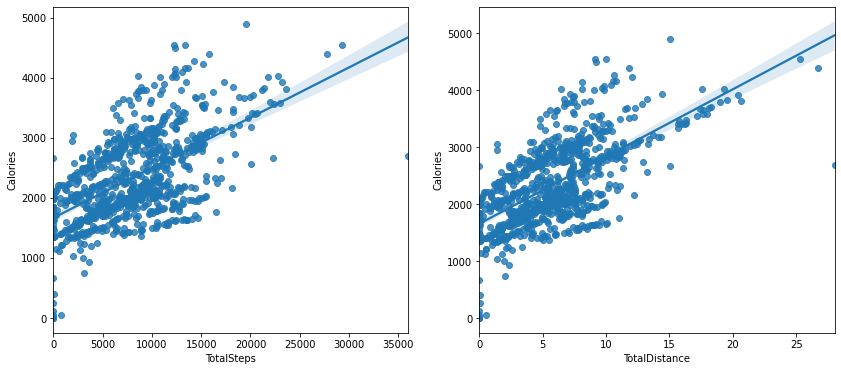

In [8]:
df_steps = df_daily[df_daily['TotalSteps'] != 0]
df_distance = df_daily[df_daily['TotalDistance'] != 0]

fig, ax = plt.subplots(1,2,figsize=(14,6))

ax_steps = sns.regplot(data = df_daily, x = 'TotalSteps', y = 'Calories', ax = ax[0])

ax_distance = sns.regplot(data = df_daily, x = 'TotalDistance', y = 'Calories', ax = ax[1])

#### As the month progresses, the amount of times people that track their daily activity drops

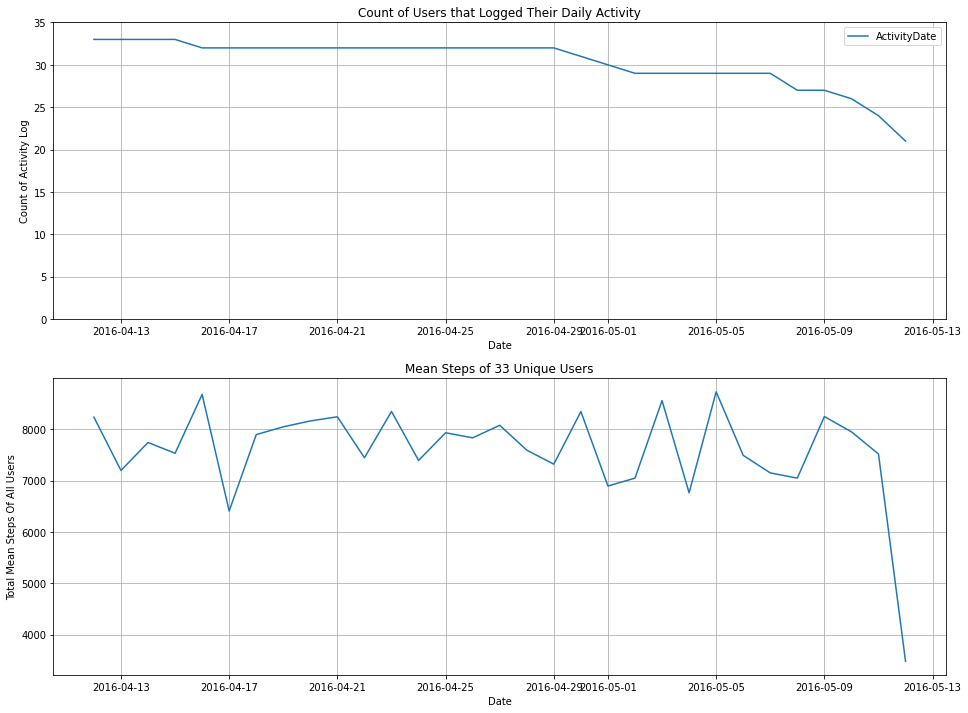

In [9]:
fig, ax = plt.subplots(2,1,figsize=(16, 12))


df_daily_num_logs = pd.DataFrame(df_daily['ActivityDate'].value_counts())

ax_user_count = sns.lineplot(data = df_daily_num_logs, ax = ax[0])
ax_user_count.set_ylim(0, 35)
ax_user_count.set_ylabel('Count of Activity Log')
ax_user_count.set_xlabel('Date')
ax_user_count.set_title('Count of Users that Logged Their Daily Activity')
ax_user_count.grid()

ax_mean_steps = sns.lineplot(data = df_daily.groupby('ActivityDate')['TotalSteps'].mean(), ax = ax[1])
ax_mean_steps.set_ylabel('Total Mean Steps Of All Users')
ax_mean_steps.set_xlabel('Date')
ax_mean_steps.set_title('Mean Steps of 33 Unique Users')
ax_mean_steps.grid()

plt.show()

### Correlation Matrix and Correlation Heatmap

In [10]:
corr = df_daily.drop(columns = 'Id').corr()
corr

,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
TotalSteps,1.000000,0.985369,0.984822,0.181849,0.740115,0.507105,0.692208,0.070505,0.667079,0.498693,0.569600,-0.327484,0.591568
TotalDistance,0.985369,1.000000,0.999505,0.188332,0.794582,0.470758,0.662002,0.082389,0.681297,0.462899,0.516300,-0.288094,0.644962
TrackerDistance,0.984822,0.999505,1.000000,0.162585,0.794338,0.470277,0.661365,0.074591,0.680816,0.463154,0.514713,-0.289343,0.645313
LoggedActivitiesDistance,0.181849,0.188332,0.162585,1.000000,0.150852,0.076527,0.138302,0.154996,0.234443,0.053860,0.102135,-0.046999,0.207595
VeryActiveDistance,0.740115,0.794582,0.794338,0.150852,1.000000,0.192986,0.157669,0.046117,0.826681,0.211730,0.059845,-0.061754,0.491959
ModeratelyActiveDistance,0.507105,0.470758,0.470277,0.076527,0.192986,1.000000,0.237847,0.005793,0.225464,0.946934,0.162092,-0.221436,0.216790
LightActiveDistance,0.692208,0.662002,0.661365,0.138302,0.157669,0.237847,1.000000,0.099503,0.154966,0.220129,0.885697,-0.413552,0.466917
SedentaryActiveDistance,0.070505,0.082389,0.074591,0.154996,0.046117,0.005793,0.099503,1.000000,0.008258,-0.022361,0.124185,0.035475,0.043652
VeryActiveMinutes,0.667079,0.681297,0.680816,0.234443,0.826681,0.225464,0.154966,0.008258,1.000000,0.312420,0.051926,-0.164671,0.615838
FairlyActiveMinutes,0.498693,0.462899,0.463154,0.053860,0.211730,0.946934,0.220129,-0.022361,0.312420,1.000000,0.148820,-0.237446,0.297623


##### The total distance someone travels has the highest correlation with calories burnt

In [11]:
# Highest correlated fields with calories
corr.iloc[-1].sort_values(ascending = False)

Calories                    1.000000
TrackerDistance             0.645313
TotalDistance               0.644962
VeryActiveMinutes           0.615838
TotalSteps                  0.591568
VeryActiveDistance          0.491959
LightActiveDistance         0.466917
FairlyActiveMinutes         0.297623
LightlyActiveMinutes        0.286718
ModeratelyActiveDistance    0.216790
LoggedActivitiesDistance    0.207595
SedentaryActiveDistance     0.043652
SedentaryMinutes           -0.106973
Name: Calories, dtype: float64

##### Heatmap of daily activities. Values lighter and closer to 1 are positively correlated, while those that negative values are negatively correlated

<AxesSubplot:>

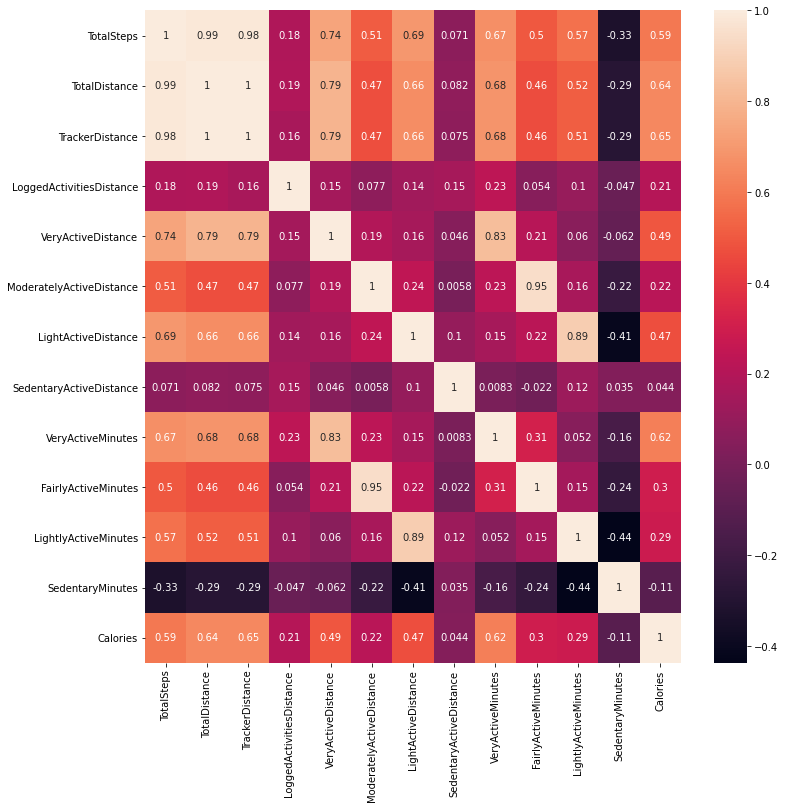

In [12]:
plt.figure(figsize = (12,12))
sns.heatmap(df_daily.drop(columns = 'Id').corr(), annot=True)

#### Regressionplot of Activity Distance and Calories, Very Active is the most correlated with Calories

<AxesSubplot:xlabel='SedentaryActiveDistance', ylabel='Calories'>

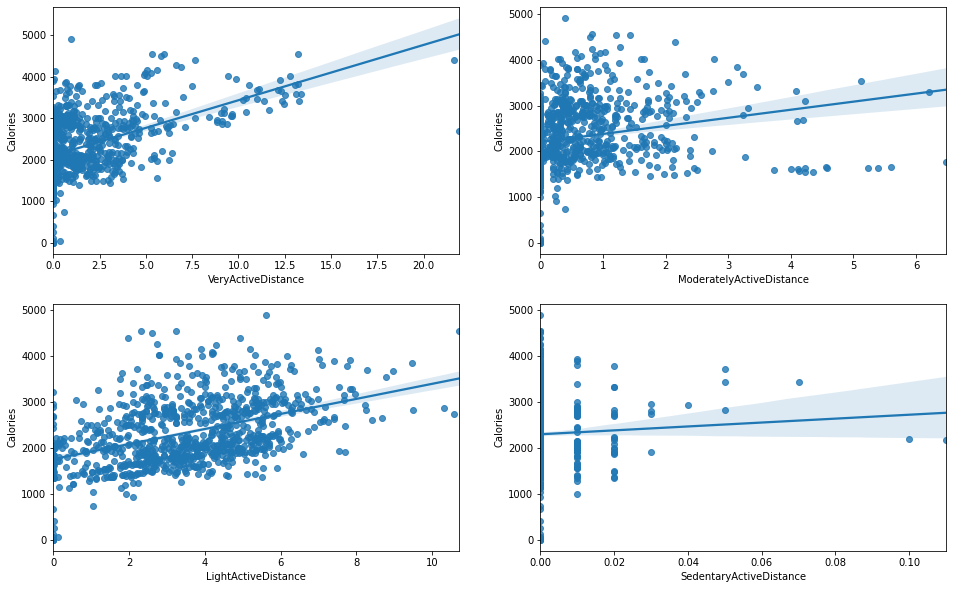

In [13]:
fig, ax = plt.subplots(2,2,figsize=(16, 10))

sns.regplot(ax = ax[0,0], data = df_daily, x='VeryActiveDistance', y ='Calories')

sns.regplot(ax = ax[0,1],data = df_daily, x='ModeratelyActiveDistance', y ='Calories')

sns.regplot(ax = ax[1,0],data = df_daily, x='LightActiveDistance', y ='Calories')

sns.regplot(ax = ax[1,1],data = df_daily, x='SedentaryActiveDistance', y ='Calories')

#### Activity Type Minutes Shown more in magnitude, minutes spent sedentary have a negative correlation with calories burned

<AxesSubplot:xlabel='SedentaryMinutes', ylabel='Calories'>

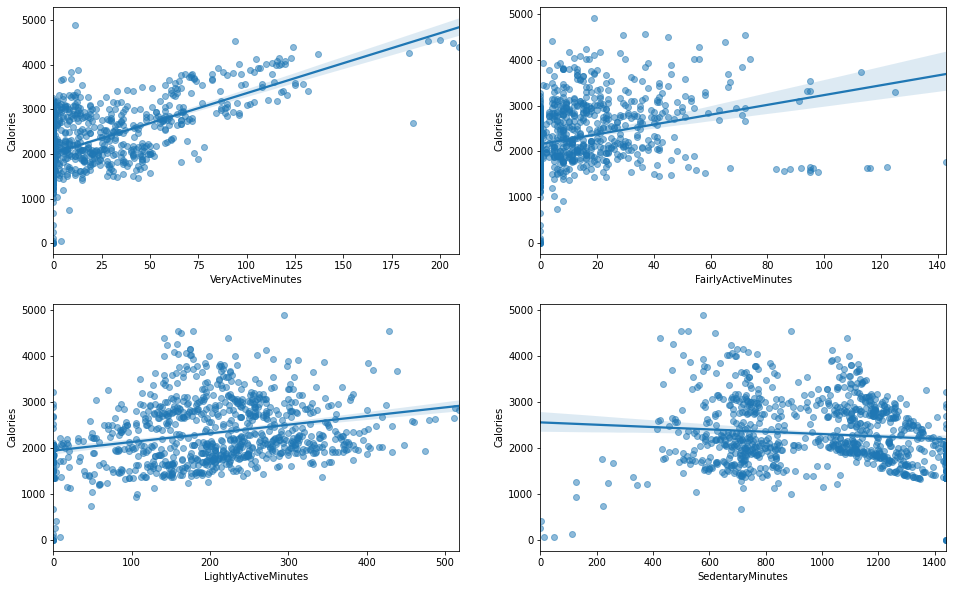

In [14]:
# Regressionplot of Minutes and Calories
fig, ax = plt.subplots(2,2,figsize=(16, 10))

sns.regplot(ax = ax[0,0], data = df_daily, x='VeryActiveMinutes', y ='Calories', scatter_kws={'alpha':0.5})

sns.regplot(ax = ax[0,1],data = df_daily, x='FairlyActiveMinutes', y ='Calories',scatter_kws={'alpha':0.5})

sns.regplot(ax = ax[1,0],data = df_daily, x='LightlyActiveMinutes', y ='Calories',scatter_kws={'alpha':0.5})

sns.regplot(ax = ax[1,1],data = df_daily, x='SedentaryMinutes', y ='Calories',scatter_kws={'alpha':0.5})

## Breaking Down Metrics by Weekday

In [15]:
print("The data is recorded from:",df_daily['ActivityDate'].min(), "to", df_daily['ActivityDate'].max())

The data is recorded from: 2016-04-12 00:00:00 to 2016-05-12 00:00:00


#### 2016-04-12 was a tuesday, and 2016-05-12 was a wednesday. Visualizaing the weekdays and the amount of activity logs on that day show that people are least like to wear their fitbit on Monday.

#### The day people are most likely to wear a fitbit is on Tuesday, which the counts then decrease steadily into next week's Monday

<AxesSubplot:>

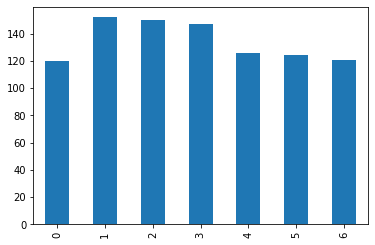

In [16]:
df_daily['weekday'] = df_daily['ActivityDate'].dt.weekday

df_daily['weekday'].value_counts().sort_index(ascending=True).plot(kind='bar')

# Monday = 0
# Sunday = 6

In [17]:
print("Range of our User's Average Burned Calories:",int(df_daily.groupby('Id')['Calories'].mean().min()),
      "-", int(df_daily.groupby('Id')['Calories'].mean().max()))

Range of our User's Average Burned Calories: 1483 - 3436


<AxesSubplot:xlabel='Id'>

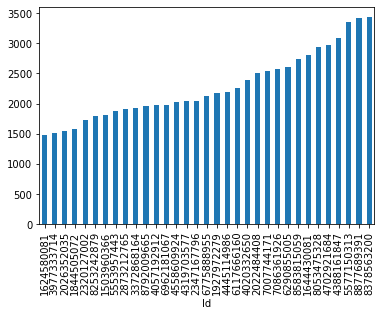

In [18]:
df_daily.groupby('Id')['Calories'].mean().sort_values(ascending=True).plot(kind='bar')

## Weekday vs Activity Types

#### On a top level view, there isn't a large difference between the days people do activies

In [19]:
df_groupby_sedentary = pd.DataFrame(df_daily.groupby('weekday')['SedentaryMinutes'].mean())
df_groupby_lightly = pd.DataFrame(df_daily.groupby('weekday')['LightlyActiveMinutes'].mean())
df_groupby_fairly = pd.DataFrame(df_daily.groupby('weekday')['FairlyActiveMinutes'].mean())
df_gropuby_very_active = pd.DataFrame(df_daily.groupby('weekday')['VeryActiveMinutes'].mean())

<AxesSubplot:xlabel='weekday', ylabel='SedentaryMinutes'>

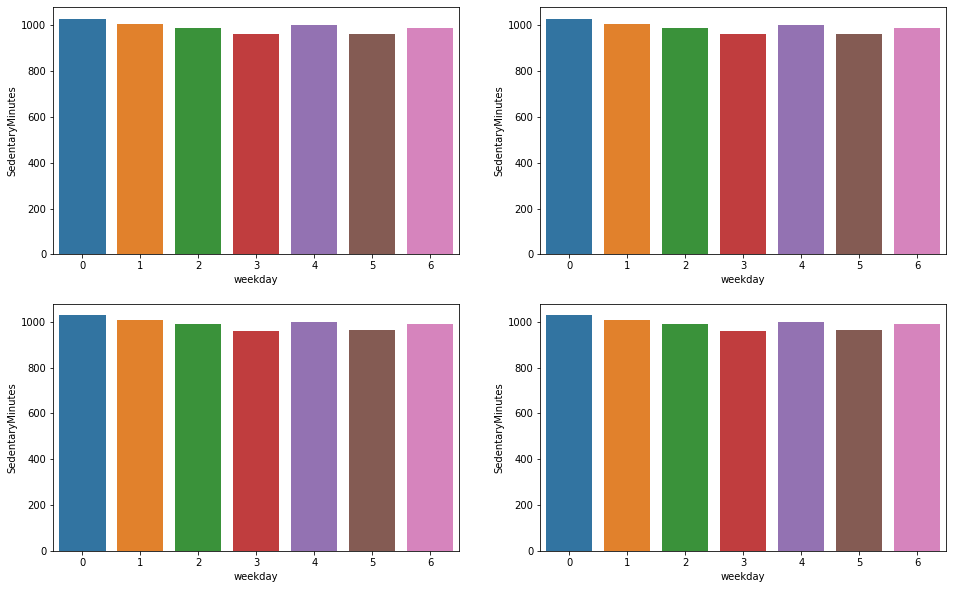

In [20]:
#Plotting out the activity minute means across weekdays,
#with monday = 0, Sunday = 6

fig, ax = plt.subplots(2,2,figsize=(16, 10))

sns.barplot(ax = ax[0,0], data = df_groupby_sedentary, x = df_groupby_sedentary.index, y = 'SedentaryMinutes')

sns.barplot(ax = ax[0,1], data = df_groupby_sedentary, x = df_groupby_sedentary.index, y = 'SedentaryMinutes')

sns.barplot(ax = ax[1,0], data = df_groupby_sedentary, x = df_groupby_sedentary.index, y = 'SedentaryMinutes')

sns.barplot(ax = ax[1,1], data = df_groupby_sedentary, x = df_groupby_sedentary.index, y = 'SedentaryMinutes')

### There are about 1440 minutes in a day, it seems that there are some days where people are completely sedentary. There also seems to be a separation around the 900 minute time. This could be the split between people who wear their fit bit to sleep and those who do not

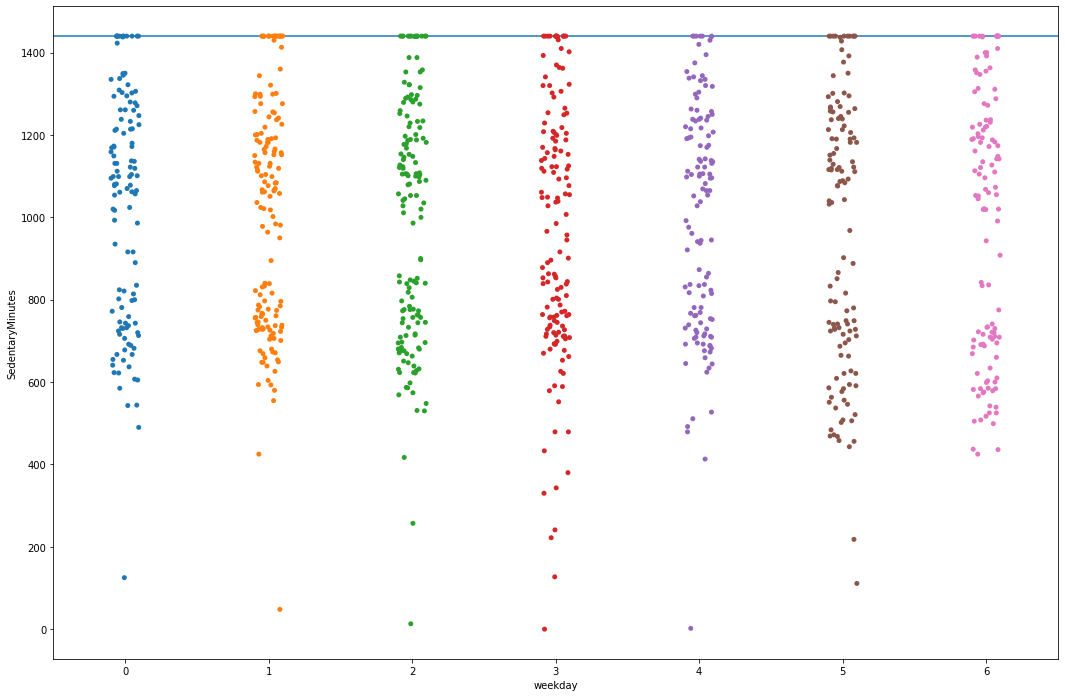

In [21]:
plt.figure(figsize=(18,12))
ax_strip_plot = sns.stripplot(x="weekday", y="SedentaryMinutes", data=df_daily)

#This line marks 24 hours
ax_strip_plot.axhline(1440)

##### Most of people's days are spent sedentary

<AxesSubplot:xlabel='weekday', ylabel='SedentaryMinutes'>

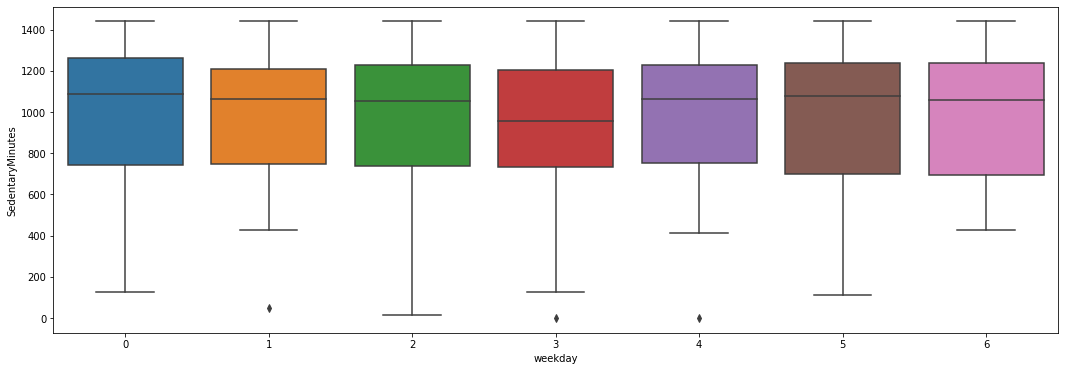

In [22]:
plt.figure(figsize=(18,6))
sns.boxplot(x="weekday", y="SedentaryMinutes", data=df_daily)

<AxesSubplot:xlabel='weekday', ylabel='LightlyActiveMinutes'>

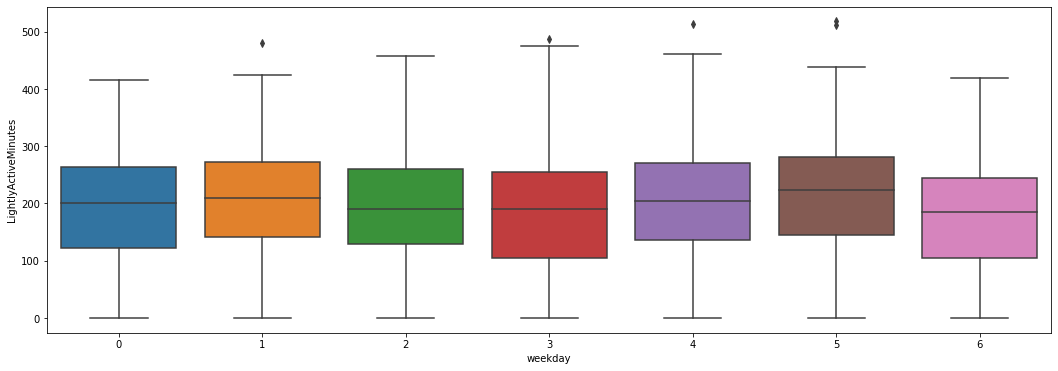

In [23]:
plt.figure(figsize=(18,6))
sns.boxplot(x="weekday", y="LightlyActiveMinutes", data=df_daily)

<AxesSubplot:xlabel='weekday', ylabel='FairlyActiveMinutes'>

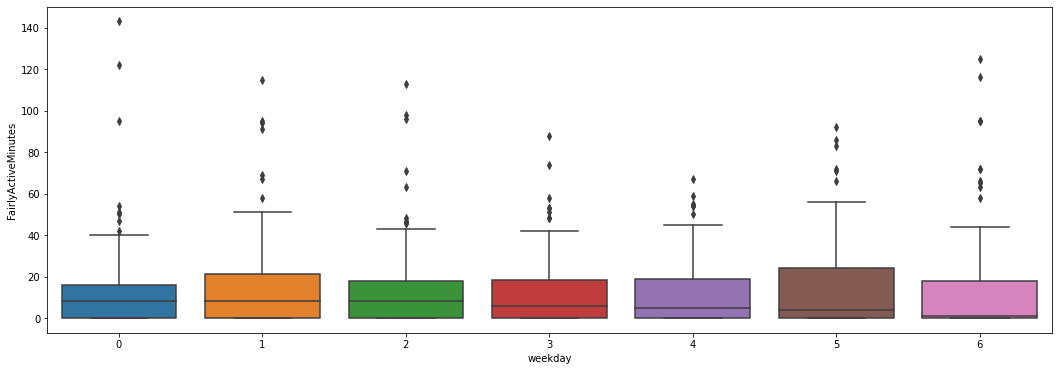

In [24]:
plt.figure(figsize=(18,6))
sns.boxplot(x="weekday", y="FairlyActiveMinutes", data=df_daily)

##### Lots of outliers on Sunday, yet the median and IQR is very low. This indicates that there are many people who prefer to exercise on Sunday and those who choose to take a break on that day.

##### While days like Monday, where there are few outliers and the boxplot contains more of the data points indiciates that many people prefer to exercise on Monday.

<AxesSubplot:xlabel='weekday', ylabel='VeryActiveMinutes'>

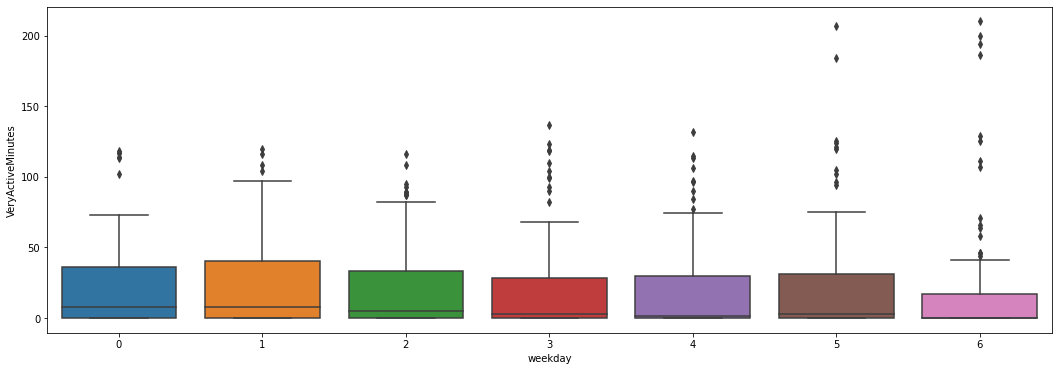

In [25]:
plt.figure(figsize=(18,6))
sns.boxplot(x="weekday", y="VeryActiveMinutes", data=df_daily)

# EDA of Minute Data

### Calories Burnt by Hour

In [26]:
df_minutes = pd.read_csv(file_path + 'minuteCaloriesWide_merged.csv')
df_minutes['ActivityHour'] = pd.to_datetime(df_minutes['ActivityHour'])

In [27]:
df_minutes_orig = df_minutes

##### Plot of mean calories burned every hour of every day summed together

In [28]:
df_minutes['ActivityHourExtractedhour'] = df_minutes['ActivityHour'].dt.hour

groupby_minutes_aggregate = df_minutes.drop(columns = ['Id', 'ActivityHour']).groupby('ActivityHourExtractedhour').mean()
groupby_minutes_aggregate

,Calories00,Calories01,Calories02,Calories03,Calories04,Calories05,Calories06,Calories07,Calories08,Calories09,...,Calories50,Calories51,Calories52,Calories53,Calories54,Calories55,Calories56,Calories57,Calories58,Calories59
ActivityHourExtractedhour,,,,,,,,,,,,,,,,,,,,,
0,1.272130,1.242750,1.234776,1.252087,1.257591,1.236933,1.241350,1.230408,1.210740,1.210246,...,1.184713,1.185324,1.185666,1.182778,1.173492,1.160921,1.163776,1.168123,1.156160,1.170643
1,1.167493,1.179307,1.167544,1.178374,1.177072,1.177036,1.188671,1.193555,1.168190,1.165022,...,1.141204,1.158923,1.160141,1.159195,1.162621,1.158598,1.164121,1.167546,1.174947,1.175542
2,1.166652,1.172222,1.172107,1.173308,1.184725,1.171136,1.187758,1.176304,1.177527,1.152872,...,1.135476,1.128225,1.140678,1.134899,1.132757,1.140221,1.128700,1.139313,1.131744,1.126476
3,1.118741,1.121119,1.125410,1.125617,1.119385,1.117195,1.114505,1.119397,1.127144,1.121305,...,1.114108,1.120537,1.121040,1.119972,1.115406,1.125290,1.128117,1.122065,1.122561,1.124760
4,1.130990,1.136524,1.146650,1.148108,1.144750,1.139603,1.135959,1.136847,1.140819,1.129201,...,1.123138,1.118626,1.121491,1.122391,1.123022,1.124949,1.129785,1.123280,1.129349,1.131735
5,1.306789,1.325882,1.342490,1.368625,1.368936,1.357319,1.341491,1.336733,1.335032,1.339467,...,1.441204,1.425442,1.447441,1.448498,1.474349,1.305058,1.279217,1.296645,1.291418,1.300817
6,1.310809,1.341811,1.358283,1.355684,1.352559,1.332244,1.326764,1.368738,1.355445,1.377366,...,1.540867,1.514522,1.529466,1.563904,1.554026,1.542393,1.551372,1.565423,1.542784,1.583210
7,1.590122,1.603768,1.570924,1.535712,1.536827,1.535931,1.518944,1.523773,1.554180,1.530082,...,1.590413,1.593686,1.607732,1.628737,1.654499,1.673738,1.713289,1.711423,1.708667,1.682891
8,1.658080,1.638651,1.683891,1.680618,1.683169,1.675028,1.671742,1.719172,1.665201,1.642108,...,1.755901,1.726591,1.734314,1.755483,1.748348,1.776085,1.753359,1.744493,1.780691,1.743217


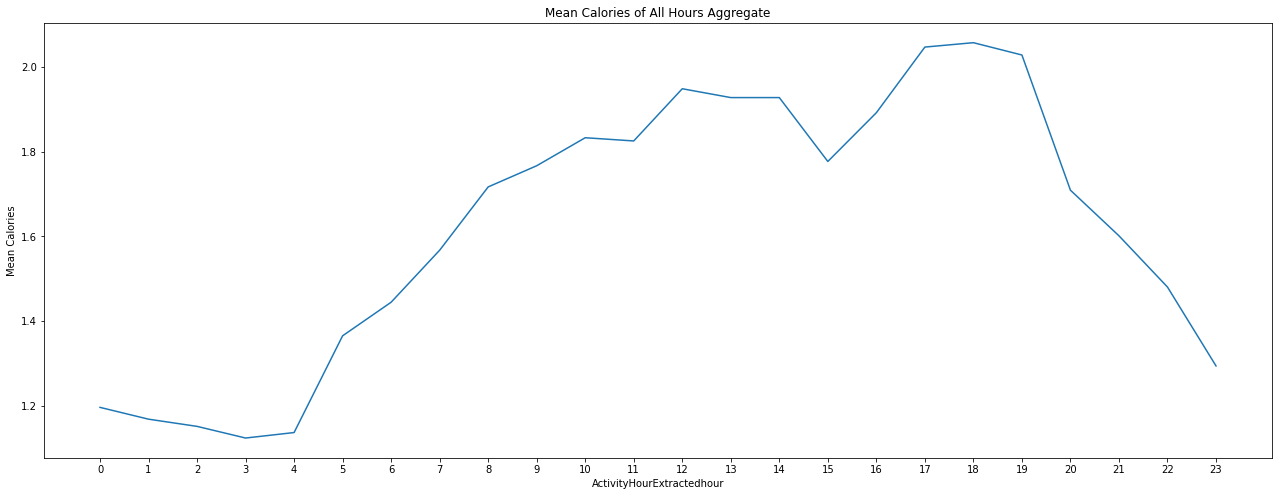

In [29]:
plt.figure(figsize= (22,8))
groupby_minutes_hour_mean = groupby_minutes_aggregate.sum(axis = 1) / len(groupby_minutes_aggregate.columns)

ax = sns.lineplot(data = groupby_minutes_hour_mean)
plt.xticks([i for i in range(24)])
ax.set_ylabel('Mean Calories')
ax.set_title("Mean Calories of All Hours Aggregate")
plt.show()

##### Interactive Line Plot, zooming in, we can see consistent peaks in the morning hours, afternoon hours, evening hours

In [30]:
#Calculating the mean sum of calories burnt every hour
df_minutes_date_groupby = df_minutes.drop(columns = ['Id']).groupby('ActivityHour').mean()

df_minutes_date_groupby_mean = df_minutes_date_groupby.sum(axis = 1)

df_minutes_date_groupby_mean

ActivityHour
2016-04-13 00:00:00     69.689142
2016-04-13 01:00:00     69.910628
2016-04-13 02:00:00     71.190204
2016-04-13 03:00:00     70.220898
2016-04-13 04:00:00     73.252770
                          ...    
2016-05-13 04:00:00     72.958486
2016-05-13 05:00:00    122.445448
2016-05-13 06:00:00     80.960065
2016-05-13 07:00:00     96.584554
2016-05-13 08:00:00     84.575104
Length: 729, dtype: float64

In [31]:
p = figure(title = 'Mean Calories Burnt by Hour', 
           x_axis_label = 'ActivityDateTime',
           y_axis_label = 'Mean Calories Burned',
           x_axis_type='datetime',
          )

In [32]:
output_notebook()
p.line(x = df_minutes_date_groupby_mean.index, y = df_minutes_date_groupby_mean.values, line_width = 2)

show(p)

Loading BokehJS ...

## Quick Linear Regression on Predicting Daily Calories Burned

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import datetime as dt

df_daily_activities = df_daily_orig
df_daily_activities['ActivityDate'] = pd.to_datetime(df_daily_activities['ActivityDate'])
df_daily_activities

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,weekday
0,1503960366,2016-04-12,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985,1
1,1503960366,2016-04-13,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797,2
2,1503960366,2016-04-14,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776,3
3,1503960366,2016-04-15,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745,4
4,1503960366,2016-04-16,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847,6
936,8877689391,2016-05-09,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710,0
937,8877689391,2016-05-10,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832,1
938,8877689391,2016-05-11,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832,2


### Data Preprocessing

###### Drop columns that we cannot train our model on.

In [34]:
df_daily_activities = df_daily_activities.drop(columns = ['Id'])

##### Convert Activity Date to ordinal data. Though this can be useful for predicting the weight of a single user. For multiple users however, it can confuse the algorithm

In [35]:
df_daily_activities['ActivityDate']= df_daily_activities['ActivityDate'].map(dt.datetime.toordinal)

##### Splitting our Data into Train and Testing Data

In [36]:
X_train, X_test, y_train, y_test = train_test_split(df_daily_activities.drop(columns = ['Calories']),
                                                    df_daily_activities['Calories'], random_state = 42)

##### From a small data set of just 33 individuals, we can predict with a fairly decent $R^2$ value

In [37]:
Linear_Regression = LinearRegression()

Linear_Regression.fit(X_train, y_train)

prediction = Linear_Regression.predict(X_test)

Linear_Regression.score(X_test,y_test)

0.7260113829774035